# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 3</span>

# Monte Carlo Methods for Option Pricing

In this exercise, we want to use Monte Carlo techniques to calculate the price of call and put European options under the assumptions of the Black-Scholes model. For this model, we know the analytical solution, and we can therefore check the effectiveness of the methods used for comparison.

This type of option is conceptually quite simple: the option seller guarantees the buyer the possibility to buy (call option) or sell (put option) an asset for a predetermined price $K$ at a (future) time $T$. The profit that the buyer receives is therefore

$\max[0, S(T) - K]$

in the case of call options and

$\max[0, K - S(T)]$

in the case of put options. Obviously, the seller will require compensation in exchange for the agreement; our task is precisely to understand how much the option should cost. Let's recall the assumptions of the Black-Scholes theory:

- The market is perfectly efficient
- The price of the asset evolves according to geometric Brownian motion $(\sim GBM(r, \sigma^2))$

If we consider a situation described by the parameters:

- $S(t = 0) = 100$
- $T = 1$
- $K = 100$
- $r = 0.1$
- $\sigma = 0.25$

we obtain analytically that the correct prices at time $t = 0$ are C=14.975 for call options and C=5.459 for put options.

Alternatively, we can estimate the price of the options with Monte Carlo methods. This solution is more general and allows us to price different options (or with different assumptions) for which the analytical solution is unknown. In the case of European options, it is sufficient to calculate

$<e^{-rT}(S(T) - K)>$, $<e^{-rT}(K - S(T))>$

Under the assumption that the price of the asset $S(T)$ evolves according to geometric Brownian motion, we can calculate its value at one subsequent time step using the recursive relation

$S(t_{i+1}) = S(t_i) \exp [(r - \sigma^2/2)(t_{i+1} - t_i) + \sigma Z_i \sqrt{t_{i+1} - t_i}]$

with $Z_i \sim N(0, 1)$. We can consider two different approaches: evolve the price directly in a single time step, or divide the time from 0 to $T$ into a series of steps and calculate the new price step by step until $t = T$.

We have experimented with both approaches: we report the results obtained with averages on $10^4$ values divided into 100 blocks, evolving the price of the asset in a single step or in 100 successive steps.

In [2]:
import matplotlib
import matplotlib.pyplot as plt 
import numpy as np
import math

## Call option

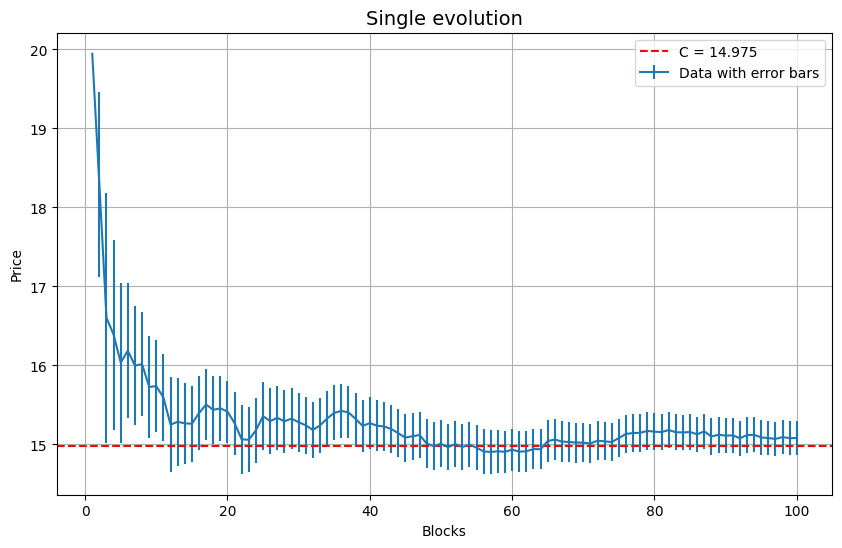

In [11]:
n, a, err = np.loadtxt("punto31Call.out", usecols=(0,1,2), delimiter="\t", unpack=True)

plt.figure(figsize=(10, 6))  

plt.errorbar(n, a, yerr=err, label='Data with error bars')

plt.axhline(y=14.975, color='red', linestyle='--', label='C = 14.975')

plt.title('Single evolution', fontsize=14)
plt.xlabel('Blocks')
plt.ylabel('Price')
plt.grid(True)
plt.legend() 
plt.show()

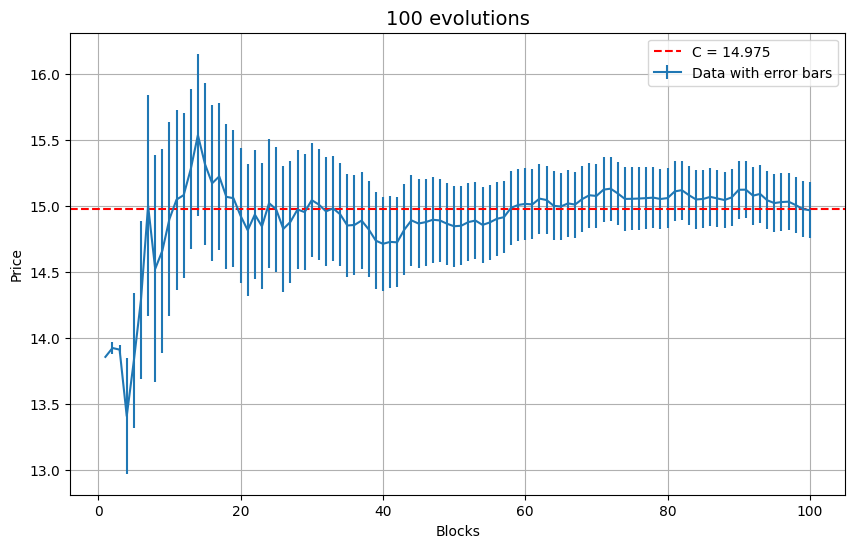

In [15]:
n, a, err = np.loadtxt("punto31Calldisc.out", usecols=(0,1,2), delimiter="\t", unpack=True)

plt.figure(figsize=(10, 6))  

plt.errorbar(n, a, yerr=err, label='Data with error bars')

plt.axhline(y=14.975, color='red', linestyle='--', label='C = 14.975')

plt.title('100 evolutions', fontsize=14)
plt.xlabel('Blocks')
plt.ylabel('Price')
plt.grid(True)
plt.legend()  
plt.show()

## Put option

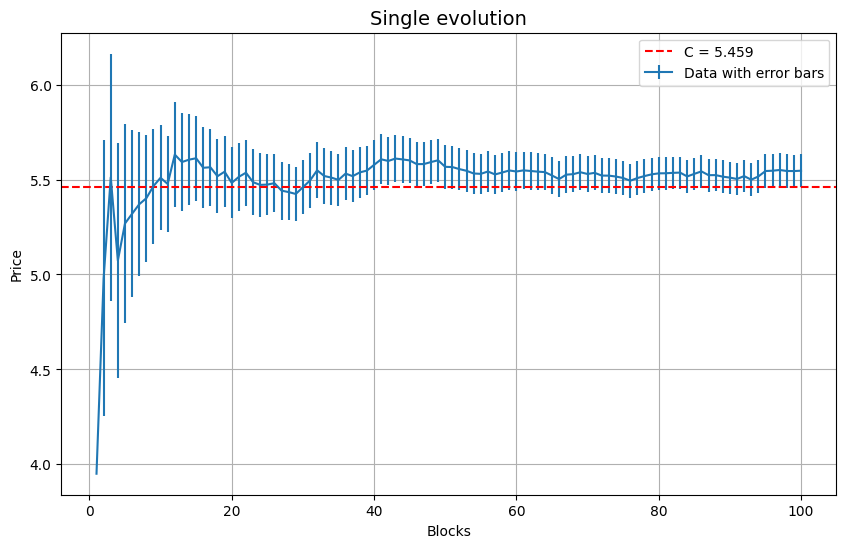

In [13]:
n, a, err = np.loadtxt("punto31Put.out", usecols=(0,1,2), delimiter="\t", unpack=True)

plt.figure(figsize=(10, 6))  

plt.errorbar(n, a, yerr=err, label='Data with error bars')

plt.axhline(y=5.459, color='red', linestyle='--', label='C = 5.459')

plt.title('Single evolution', fontsize=14)
plt.xlabel('Blocks')
plt.ylabel('Price')
plt.grid(True)
plt.legend()  
plt.show()

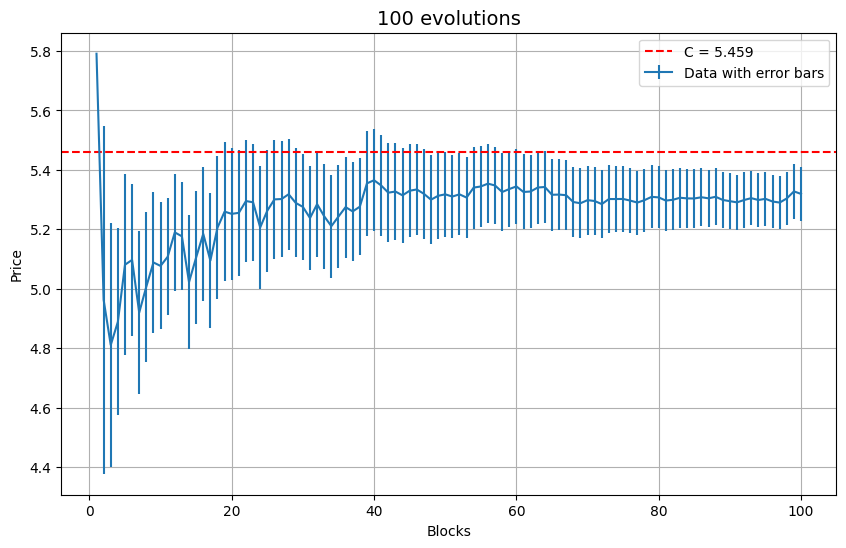

In [16]:
n, a, err = np.loadtxt("punto31Putdisc.out", usecols=(0,1,2), delimiter="\t", unpack=True)

plt.figure(figsize=(10, 6))  

plt.errorbar(n, a, yerr=err, label='Data with error bars')

plt.axhline(y=5.459, color='red', linestyle='--', label='C = 5.459')

plt.title('100 evolutions', fontsize=14)
plt.xlabel('Blocks')
plt.ylabel('Price')
plt.grid(True)
plt.legend()  
plt.show()